# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
%pip install tensorflow --upgrade
%pip install keras --upgrade

import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

     |████████████████████████████████| 497.6 MB 56 kB/s  eta 0:00:01     |████████████████▊               | 259.7 MB 2.4 MB/s eta 0:01:41
     |████████████████████████████████| 4.3 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.0 MB/s eta 0:00:011
     |████████████████████████████████| 1.4 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 4.9 MB/s eta 0:00:01
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
     |████████████████████████████████| 5.8 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.9 MB/s eta 0:00

2022-04-29 13:25:46.363616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-29 13:25:46.363638: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

11501568/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples


Create the MLP

In [3]:
model = Sequential()
#model.add(Dense(300, input_shape=(784,), activation='relu'))
model.add(Dense(300, input_shape=(784,), activation='sigmoid'))
#model.add(Dense(300, input_shape=(784,), activation='tanh'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout (Dropout)           (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                3010      
                                                                 
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


2022-04-29 13:26:02.736184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-29 13:26:02.737459: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-29 13:26:02.737574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-29 13:26:02.737668: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-29 13:26:02.737762: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Define some constants and train the MLP

In [7]:
batch_size = 128
#n_epoch = 10
n_epoch = 50

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
469/469 [==============================] - 2s 3ms/step - loss: 0.0492 - accuracy: 0.9855 - val_loss: 0.0732 - val_accuracy: 0.9817
Epoch 2/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9863 - val_loss: 0.0739 - val_accuracy: 0.9819
Epoch 3/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0458 - accuracy: 0.9867 - val_loss: 0.0753 - val_accuracy: 0.9811
Epoch 4/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9869 - val_loss: 0.0769 - val_accuracy: 0.9815
Epoch 5/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9869 - val_loss: 0.0772 - val_accuracy: 0.9811
Epoch 6/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0753 - val_accuracy: 0.9812
Epoch 7/50
469/469 [==============================] - 1s 3ms/step - loss: 0.0442 - accuracy: 0.9872 - val_loss: 0.0781 - val_accuracy: 0.9807
Epoch 

Show the performance of the model

Test score: 0.07401813566684723
Test accuracy: 0.9815000295639038


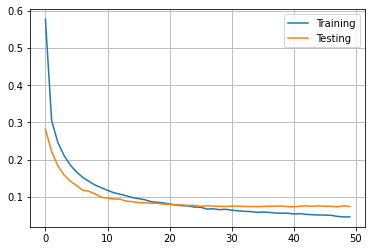

In [5]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [6]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis=-1)
me.confusion_matrix(y_test, pred)

array([[ 969,    0,    2,    2,    0,    2,    3,    1,    1,    0],
       [   0, 1129,    2,    1,    0,    1,    1,    0,    1,    0],
       [   3,    1, 1012,    0,    2,    0,    2,    6,    6,    0],
       [   0,    0,    2,  998,    0,    3,    0,    4,    2,    1],
       [   2,    0,    1,    0,  968,    0,    5,    1,    1,    4],
       [   2,    0,    0,   11,    3,  867,    4,    1,    3,    1],
       [   5,    3,    0,    1,    3,    3,  940,    0,    3,    0],
       [   2,    7,   10,    3,    0,    0,    0, 1002,    0,    4],
       [   2,    2,    4,    4,    3,    5,    2,    6,  943,    3],
       [   1,    2,    0,    5,    8,    4,    0,    2,    0,  987]])